In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('studies_info.csv')

In [5]:
df.head()

,study_id,city,state,country,lat,lon,status,start_date,start_date_type,completion_date,...,study_type,phases,allocation,intervention_model,primary_purpose,masking,healty_volunteers,sex,min_age,max_age
0,NCT05949320,North Point,NaN,Hong Kong,22.29104,114.20198,RECRUITING,2023-04-03,ACTUAL,2024-09-30,...,INTERVENTIONAL,['NA'],RANDOMIZED,PARALLEL,PREVENTION,DOUBLE,False,ALL,45 Years,75 Years
1,NCT05949320,Sai Ying Pun,NaN,Hong Kong,22.28998,114.14223,RECRUITING,2023-04-03,ACTUAL,2024-09-30,...,INTERVENTIONAL,['NA'],RANDOMIZED,PARALLEL,PREVENTION,DOUBLE,False,ALL,45 Years,75 Years
2,NCT05949320,Sha Tin,NaN,Hong Kong,22.38333,114.18333,RECRUITING,2023-04-03,ACTUAL,2024-09-30,...,INTERVENTIONAL,['NA'],RANDOMIZED,PARALLEL,PREVENTION,DOUBLE,False,ALL,45 Years,75 Years
3,NCT06214520,Singapore,NaN,Singapore,1.28967,103.85007,RECRUITING,2024-02-23,ACTUAL,2026-06-30,...,INTERVENTIONAL,['NA'],RANDOMIZED,PARALLEL,HEALTH_SERVICES_RESEARCH,NONE,False,ALL,21 Years,100 Years
4,NCT06214520,Singapore,NaN,Singapore,1.28967,103.85007,RECRUITING,2024-02-23,ACTUAL,2026-06-30,...,INTERVENTIONAL,['NA'],RANDOMIZED,PARALLEL,HEALTH_SERVICES_RESEARCH,NONE,False,ALL,21 Years,100 Years


## Clinical Trials for Diabetes

### Where diabetes clinical trials are conducted globally:

***Analyze***: How the number of diabetes trials has changed over time.

***Identify***: Peaks or declines in research activity.


/var/folders/5x/y7xchzps2tngj062ttrvln5w0000gn/T/ipykernel_55495/801167725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_start_date['start_year'] = pd.to_datetime(df['start_date'], errors='coerce').dt.year


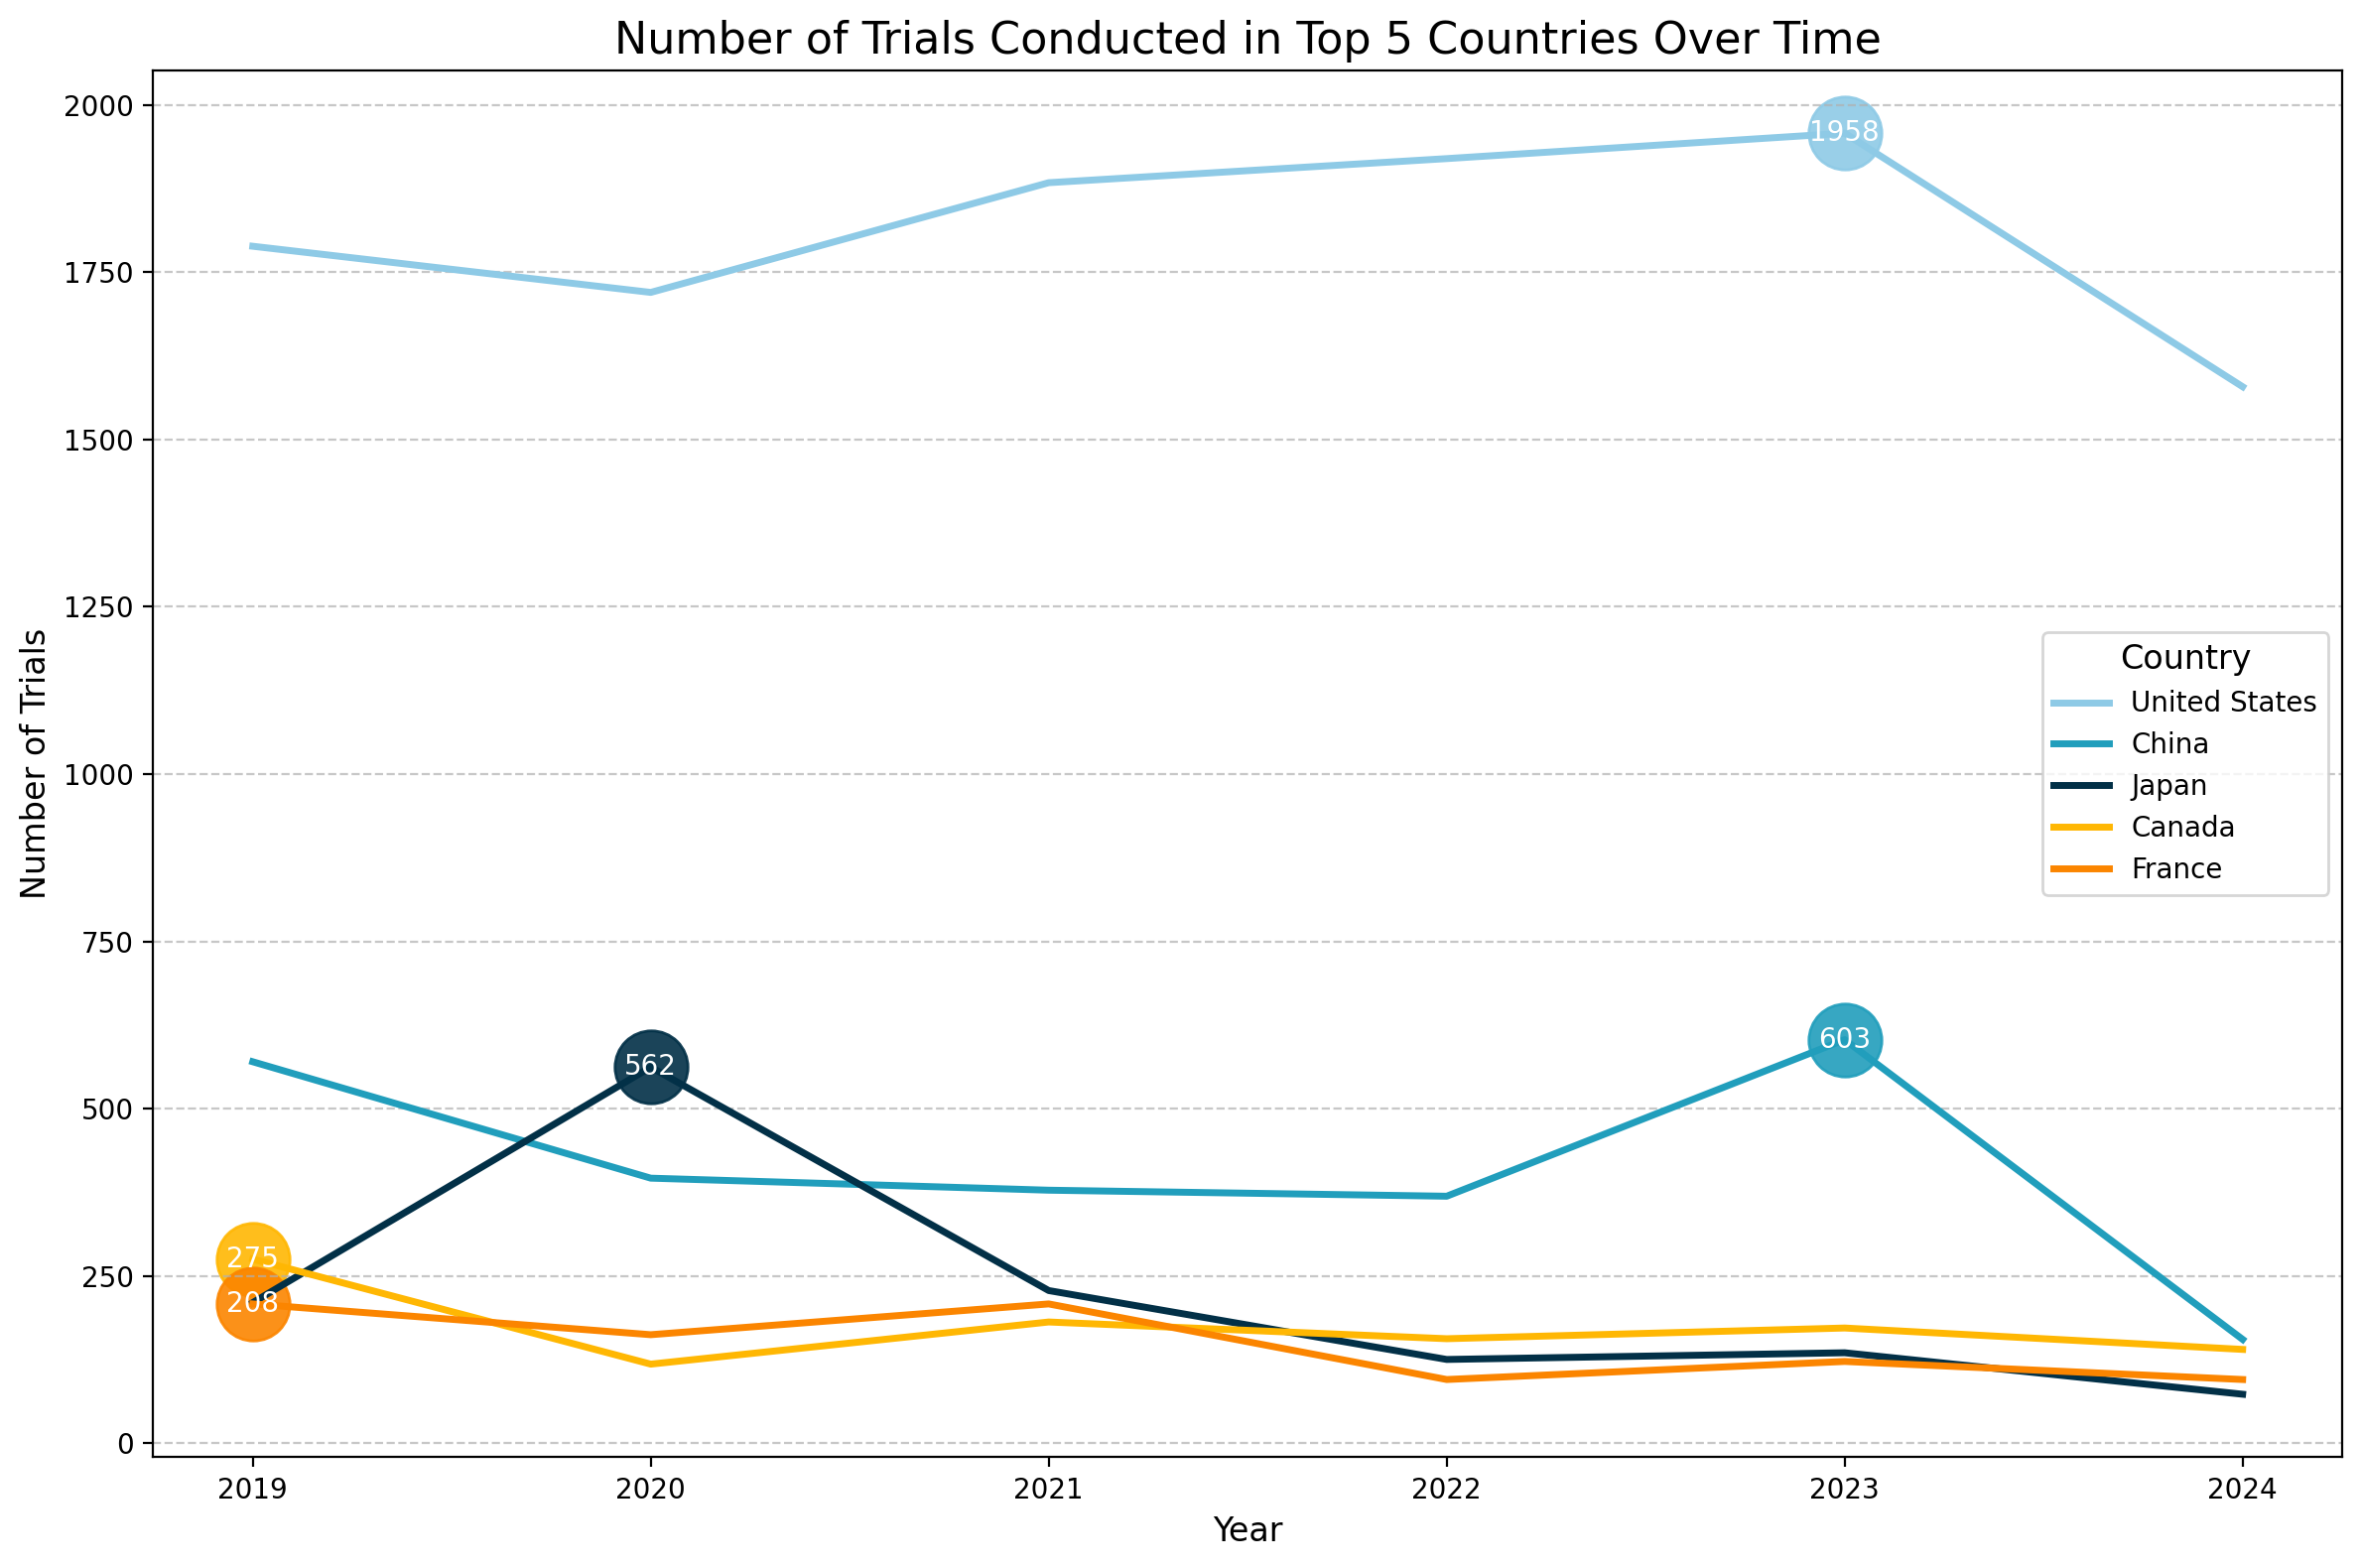

In [8]:
# Convert start_date to datetime and extract year
actual_start_date = df[df["start_date_type"]=="ACTUAL"]
actual_start_date['start_year'] = pd.to_datetime(df['start_date'], errors='coerce').dt.year

# Group by country and year, counting the number of trials
country_year_counts = actual_start_date.groupby(['country', 'start_year']).size().unstack(fill_value=0)

# Find the top 5 countries with the most trials
top_countries = country_year_counts.sum(axis=1).nlargest(5).index
top_country_data = country_year_counts.loc[top_countries]

# Define the color palette
colors = ['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500']

# Plotting the data
plt.figure(figsize=(12, 8), dpi=200)
for idx, (country, color) in enumerate(zip(top_country_data.index, colors)):
    trials = top_country_data.loc[country]
    plt.plot(trials.index, trials.values, label=country, color=color, linewidth=2.5)
    
    # Highlight highest point
    max_year = trials.idxmax()
    max_value = trials.max()
    plt.scatter(max_year, max_value, color=color, s=700, alpha=0.90)
    plt.text(max_year, max_value, f'{max_value}', color="white", ha='center', va='center', fontsize=10)

    # # Highlight lowest point
    # min_year = trials.idxmin()
    # min_value = trials.min()
    # plt.scatter(min_year, min_value, color=color, edgecolor='black', s=100, zorder=5)
    # plt.text(min_year, min_value, f'{min_value}', ha='center', va='top', fontsize=10)

# Add chart details
plt.title('Number of Trials Conducted in Top 5 Countries Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Trials', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Country', fontsize=10, title_fontsize=12)
plt.tight_layout()

# Display the plot
plt.show();